In [5]:
from sklearn import datasets, metrics
import matplotlib.pyplot as plt
import numpy as np

Load dataset

In [6]:
digits = datasets.load_digits()
X = digits.data

Print dataset shape

In [7]:
digits.data.shape

(1797, 64)

Examine first element in data

In [8]:
X[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

Create *images_and_labels* pairs in a list for all images and corresponding targets. Then loop over the 10 first pairs and print plot these in 2x5 subplots.

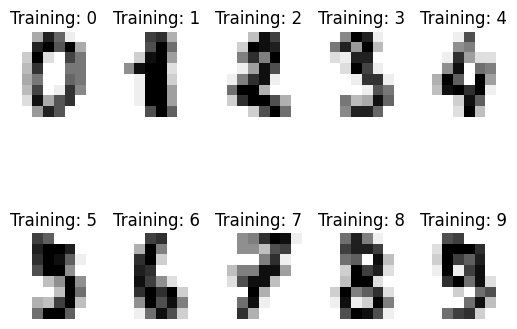

In [9]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

Now we want to use the UMAP algorithm to reduce the dimensionality of the digits dataset and visualize it in a scatter plot.

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-11-06 20:27:44.311199: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


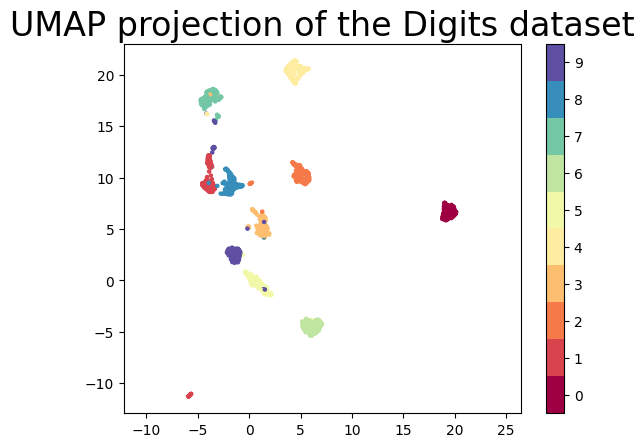

In [10]:
import umap

# Create an instance of the UMAP class with a fixed random state for reproducibility.
reducer = umap.UMAP(random_state=42)
# Fit the UMAP model to the digits data
reducer.fit(X)
# Transform the digits data into a lower dimensional space and returns a 2D array of shape (1797, 2) 
# containing the coordinates of each point in the embedding space. Before the transform the shape was 
# (1797, 64).
embedding = reducer.transform(digits.data)

# Create scatterplot of the embedding where each point has color corresponding to it's label. cmap and s 
# is color map and size for aestetics.
plt.scatter(embedding[:, 0], embedding[:, 1], c=digits.target, cmap='Spectral', s=5)
# Set the aspect ratio of the plot to be equal, so that the distances in the x and y directions are 
# comparable.
plt.gca().set_aspect('equal', 'datalim')
# Add a color bar to the plot, which shows the correspondence between the colors and the digit labels.
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
# Add a title to the plot with a specified font size.
plt.title('UMAP projection of the Digits dataset', fontsize=24);

In [11]:
mean_imgs = np.array([X[digits.target==i].mean(axis=0) for i in range(10)])

In [12]:
# Row wise l2 norm on raw data and mean. axis = 1 since we want to compute the norm of each row (image) 
# in the X array.
raw_data_norm = np.linalg.norm(X, axis=1, keepdims=True)
print(raw_data_norm)
print("-"*20)
mean_imgs_norm = np.linalg.norm(mean_imgs, axis=1, keepdims=True)
print(mean_imgs_norm)

[[55.40758071]
 [64.87680633]
 [66.24198065]
 ...
 [71.3582511 ]
 [65.69627082]
 [70.27090436]]
--------------------
[[57.21007138]
 [56.76243429]
 [56.13686576]
 [55.6744608 ]
 [55.96995923]
 [54.6351969 ]
 [57.73202669]
 [54.9510358 ]
 [57.26457834]
 [54.64989411]]


In [13]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse

# Convert to sparse matrices
#raw_data_sparse = sparse.csr_matrix(raw_data_norm)
#mean_imgs_sparse = sparse.csr_matrix(mean_imgs_norm)

# compute the cosine similarity matrix between raw data and mean images
similarities = cosine_similarity(X/raw_data_norm, mean_imgs/mean_imgs_norm) # shape (1797, 10)
print(similarities)

[[0.96953736 0.64057712 0.69033218 ... 0.69534056 0.78048386 0.82650128]
 [0.61422565 0.95983463 0.80485635 ... 0.77964591 0.85403808 0.73784076]
 [0.70985123 0.87401958 0.82590236 ... 0.77998321 0.85962083 0.72941315]
 ...
 [0.78054372 0.91604527 0.84017123 ... 0.80155401 0.94412191 0.80488239]
 [0.85063932 0.80267119 0.75221714 ... 0.76388727 0.86535741 0.92850174]
 [0.81182654 0.84447725 0.84761052 ... 0.75906702 0.92310303 0.86380316]]


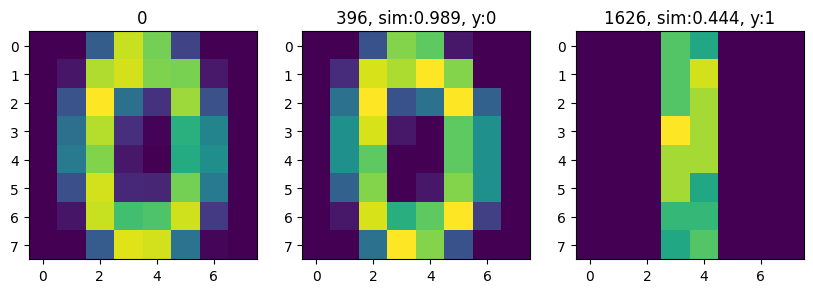

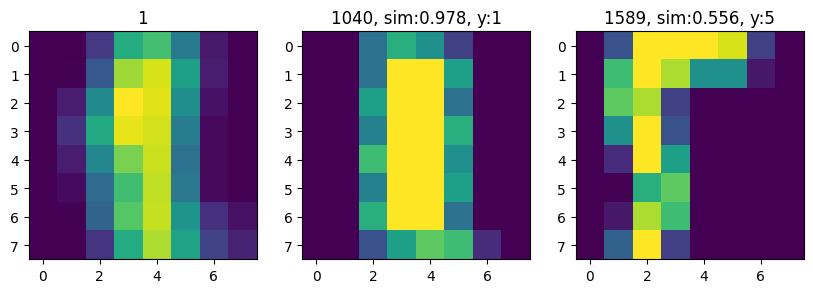

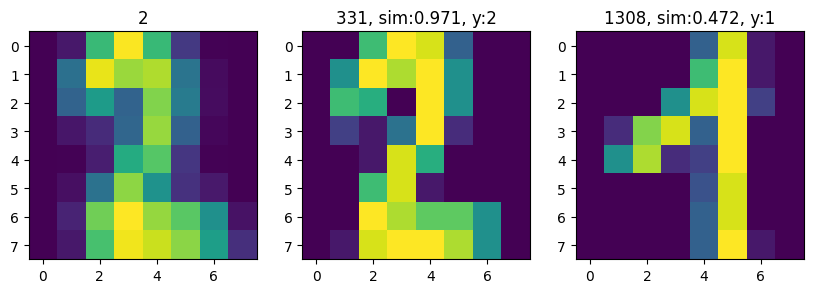

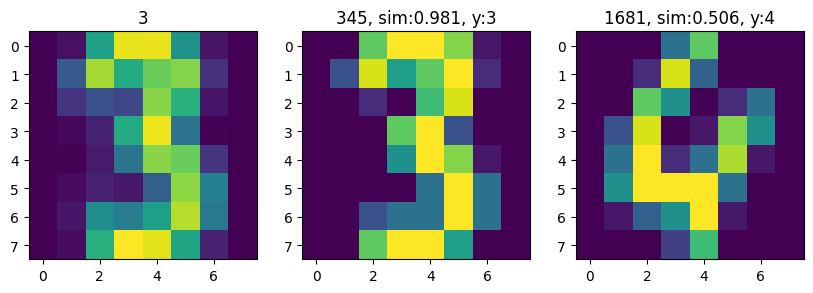

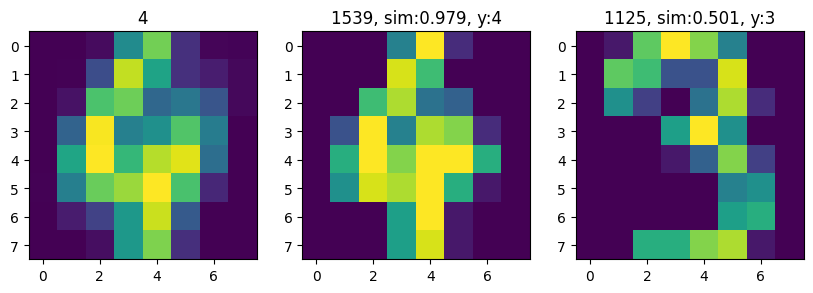

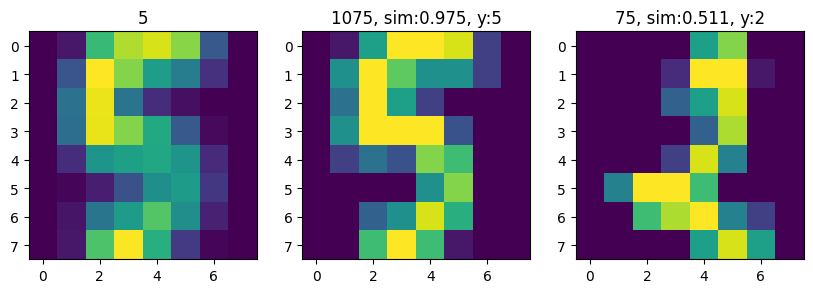

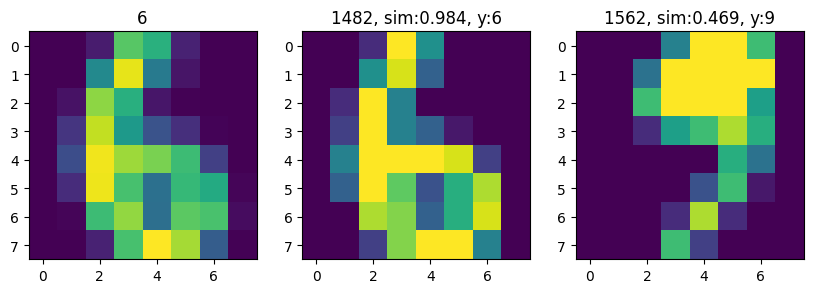

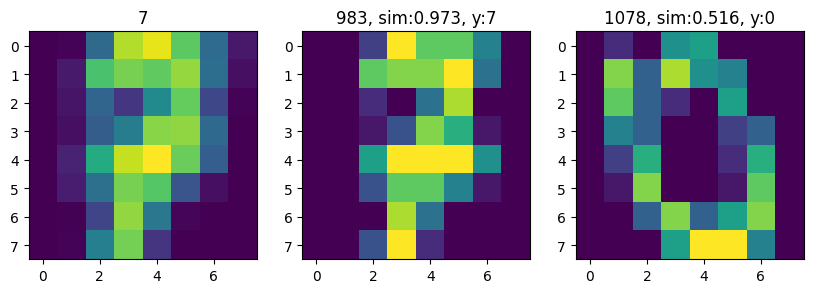

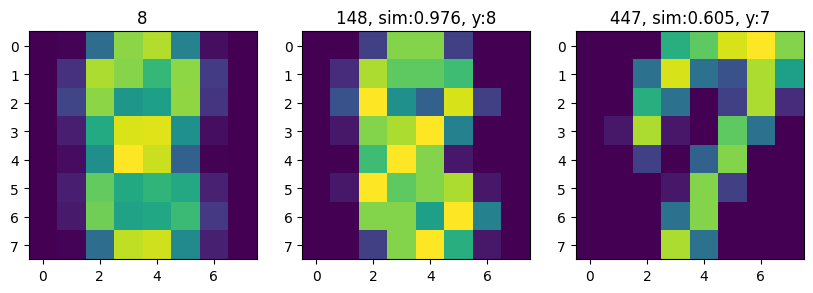

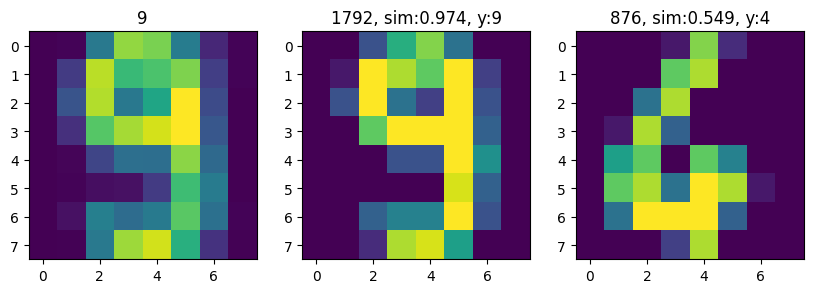

In [14]:
for i in range(10):
    
    min_idx = np.argmin(similarities[:,i]) 
    max_idx = np.argmax(similarities[:,i]) 

    fig, axs = plt.subplots(1,3,figsize=(10,10))
    
    # reference image
    axs[0].set_title(f"{i}")        
    axs[0].imshow(mean_imgs[i].reshape(8,8))
    
    # image and data with highest similarity to reference
    axs[1].set_title(f"{max_idx}, sim:{similarities[max_idx, i]:.3f}, y:{digits.target[max_idx]}")
    axs[1].imshow(X[max_idx].reshape(8,8))
    
    # image and data with lowest similarity to reference
    axs[2].set_title(f"{min_idx}, sim:{similarities[min_idx, i]:.3f}, y:{digits.target[min_idx]}")
    axs[2].imshow(X[min_idx].reshape(8,8))

plt.show()


This code will produce 10 plots, one for each class (first column, digits 0-9) showing the mean image of that class, middle showing the closest sample image to that mean image, and right showing the furthest sample image from that mean image (lowest cosine similarity). The title of each subplot will also show the index of the image, the cosine similarity value to the mean image, and the actual label of the image.

(The cosine similarity is a measure of how similar two vectors are in terms of their alignment. It ranges from -1 to 1, where 1 means the vectors are identical, 0 means they are orthogonal (perpendicular), and -1 means they are opposite directional.)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, digits.target, test_size=0.3)
print(X_train.shape)
print(X_test.shape)
# 540/(1257+540) ≈ 30%

(1257, 64)
(540, 64)


In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, algorithm='brute')

In [17]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute')

In [18]:
y_pred = knn.predict(X_test)

In [19]:
distances, neighbors = knn.kneighbors(X_test)

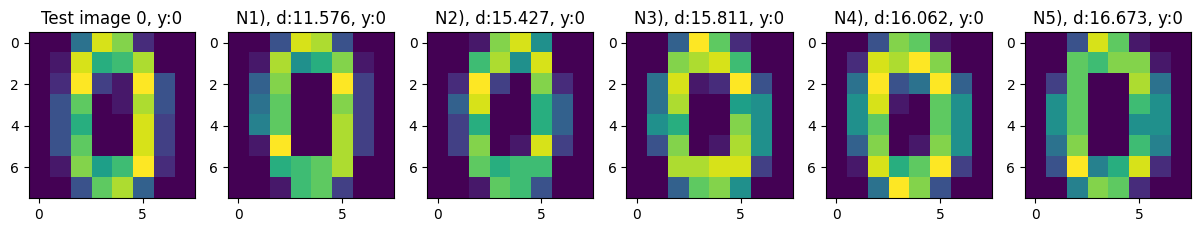

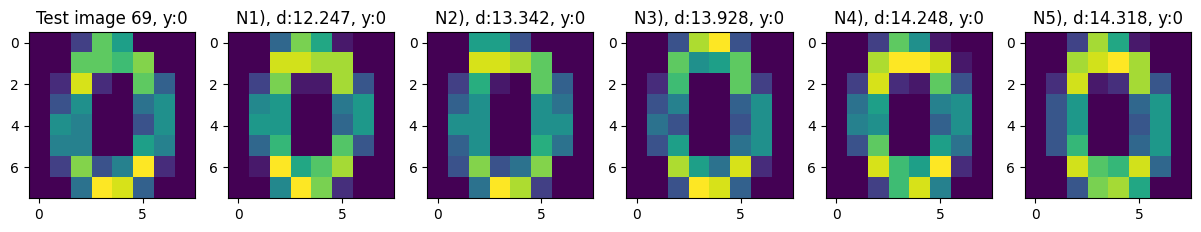

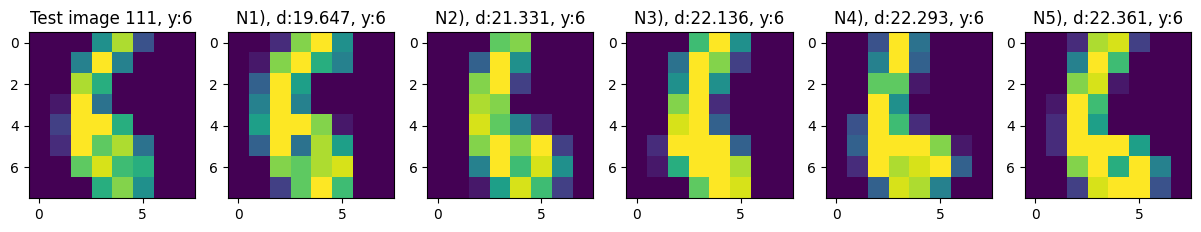

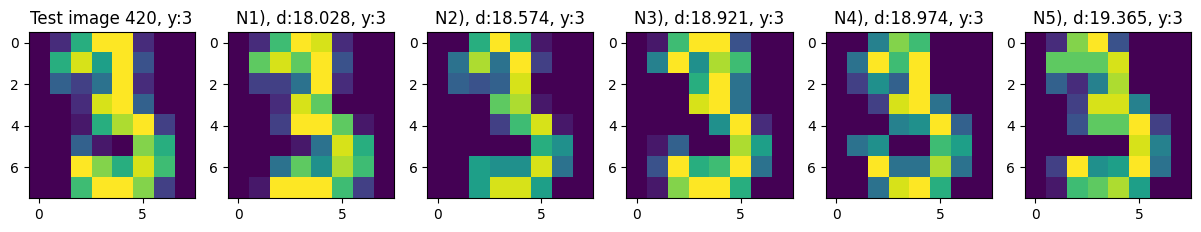

In [20]:
# Visualize the nearest neighbors for some test samples
samples = [0, 69, 42+69, 420] 
for i in samples:
    fig, axs = plt.subplots(1,6,figsize=(15,15)) # figsize is not same as nbr pixels!
    
    # Test sample 
    axs[0].set_title(f"Test image {i}, y:{y_test[i]}")
    axs[0].imshow(X_test[i].reshape(8,8))
    
    # Nearest neighbors
    for j in range(5):
        axs[j+1].set_title(f"N{j+1}), d:{distances[i,j]:.3f}, y:{y_train[neighbors[i,j]]}")
        axs[j+1].imshow(X_train[neighbors[i,j]].reshape(8,8))

plt.show()

In [23]:
print(metrics.classification_report(y_test, y_pred))
print()
print(metrics.classification_report(y_pred, y_test))
print()
print(metrics.confusion_matrix(y_test, y_pred))
print()
print(metrics.confusion_matrix(y_pred, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       0.97      1.00      0.99        67
           2       1.00      1.00      1.00        51
           3       0.94      1.00      0.97        48
           4       1.00      1.00      1.00        57
           5       1.00      1.00      1.00        49
           6       1.00      1.00      1.00        52
           7       1.00      1.00      1.00        55
           8       0.98      0.93      0.96        46
           9       1.00      0.95      0.97        59

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      0.97      0.99        69
           2       1.00      1.00      1.00        51
           3       1.00


<h2> <h2/>
<h2> Task 7 - Clustering <h2/>

In [45]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=420)

In [46]:
clusters = kmeans.fit(X_train)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


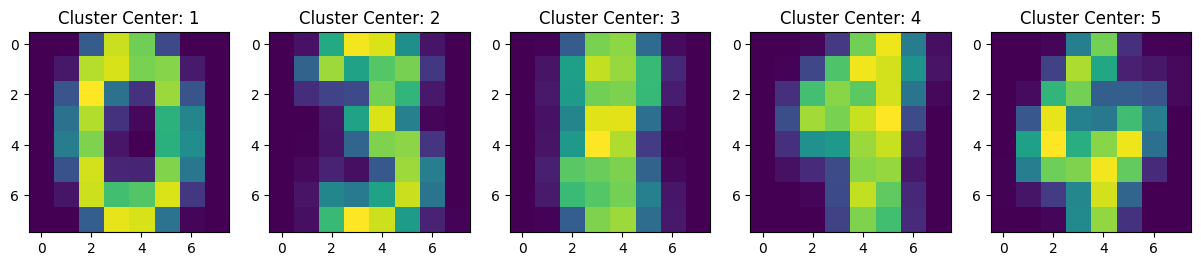

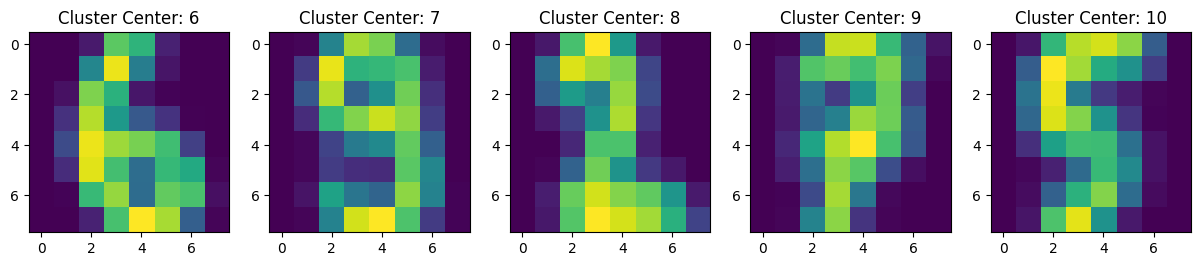

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/var/folders/9_/bscjnwmn7plg67hpcxl1l6tc0000gn/T/ipykernel_35677/3357656077.py:26: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding2[i, 0], embedding2[i, 1], c="k", marker="x", s=10, cmap='Spectral')


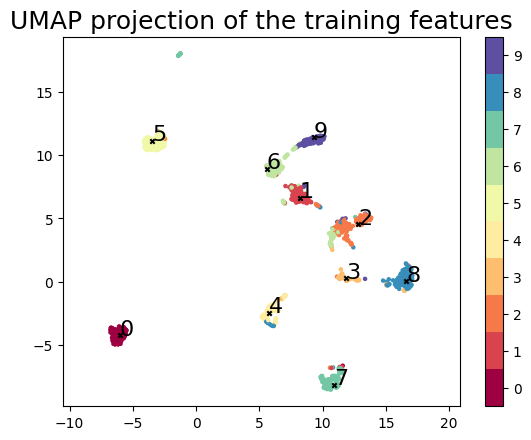

In [47]:
# Plot the cluster centers as images
count = 0
for i in range(2):
    fig, axs = plt.subplots(1,5,figsize=(15,15))
    for j in range(5):
        # Get the cluster center image
        img = clusters.cluster_centers_[count].reshape(8,8)
        count = count + 1
        axs[j].set_title(f"Cluster Center: {count}")
        axs[j].imshow(img) # For grey img: (img, cmap='gray')

plt.show()

reducer = umap.UMAP(random_state=69)
reducer.fit(X_train)
embedding = reducer.transform(X_train)
plt.scatter(embedding[:, 0], embedding[:, 1], c=clusters.labels_, cmap='Spectral', s=5) 
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the training features', fontsize=18);

# Plot centers as integers
embedding2 = reducer.transform(clusters.cluster_centers_)
for i in range(len(embedding2[:,0])):
    plt.text(embedding2[i, 0], embedding2[i, 1], str(i), fontsize=16)
    plt.scatter(embedding2[i, 0], embedding2[i, 1], c="k", marker="x", s=10, cmap='Spectral')

plt.show()

In [48]:
y_pred = kmeans.predict(X_train)

In [49]:
# A clustering result satisfies completeness if all the data points that are members of a given class 
# are elements of the same cluster.
completeness = metrics.completeness_score(y_train, y_pred)
print(f"Completeness score: {completeness:.3f}")

Completeness score: 0.743


In [50]:
# A clustering result satisfies homogeneity if all of its clusters contain only data points which are 
# members of a single class.
homogeneity = metrics.homogeneity_score(y_train, y_pred)
print(f"Homogeneity score: {homogeneity:.3f}")

Homogeneity score: 0.734


In [51]:
ami = metrics.adjusted_mutual_info_score(y_train, y_pred)
print(f"Adjusted mutual information score: {ami:.3f}")

Adjusted mutual information score: 0.735


In [52]:
from statistics import mode

y_pred = kmeans.predict(X_test)

# Mapping cluster nbrs to digit labels (this solves so the algorithm is usable for classification)
cluster_labels = np.zeros_like(kmeans.labels_)
for i in range(10):
    mask = (kmeans.labels_ == i)
    cluster_labels[i] = mode(y_train[mask])

y_pred_labels = cluster_labels[y_pred]


In [53]:
print(metrics.classification_report(y_test, y_pred_labels))
print()
print(metrics.confusion_matrix(y_test, y_pred_labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       0.63      0.30      0.41        63
           2       0.84      0.76      0.80        42
           3       0.86      0.92      0.89        52
           4       0.98      0.97      0.98        62
           5       0.93      0.69      0.79        75
           6       0.96      0.98      0.97        48
           7       0.87      0.96      0.91        47
           8       0.36      0.56      0.44        45
           9       0.57      0.81      0.67        57

    accuracy                           0.78       540
   macro avg       0.80      0.79      0.79       540
weighted avg       0.81      0.78      0.78       540


[[49  0  0  0  0  0  0  0  0  0]
 [ 0 19  5  0  0  0  0  0 39  0]
 [ 0  2 32  6  0  0  0  0  1  1]
 [ 0  0  0 48  0  0  0  0  2  2]
 [ 0  0  0  0 60  0  0  1  1  0]
 [ 0  0  0  1  1 52  1  0  0 20]
 [ 0  0  0  0  0  0 47  0  1  0]
 [ 0  2  